In [24]:
import pandas as pd
import numpy as np
from scipy import stats
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.preprocessing import QuantileTransformer

In [25]:

#https://dacon.io/codeshare/1877
sample = pd.read_csv('sample_submission.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [26]:
country_map = {}

for i, c in enumerate(train['country'].unique()):
    country_map[c] = i
    

In [27]:
train['country'] = train['country'].map(country_map)
test['country'] = test['country'].map(country_map) #country열 Mapping

In [28]:
test = test.fillna(test.mean())
train = train.fillna(train.mean())#test 결측치 0으로 채우기

In [29]:

x_train = train.loc[:, 'Q1':'ASD']
y_train = train['nerdiness']

x_test = test.loc[:, 'Q1':'ASD'] #index와 nerdiness열 제외


In [ ]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_jobs=-1)

from sklearn.model_selection import KFold, GridSearchCV #하이퍼파라미터 튜닝을 위한 불러오기
from sklearn.metrics import accuracy_score

model_param_grid = {'n_estimators' : [100, 1000, 3000]} # Default(100)대비 큰값으로 Dictionary구성

model_grid = GridSearchCV(model, param_grid = model_param_grid, scoring="accuracy",n_jobs=-1,verbose=1) #훈련 (장치 사양에 따라 시간이 걸릴 수 있음)
model_grid.fit(x_train, y_train)

#pred = model_grid.predict_proba(x_test)[:,1] #proba를 통해 확률값으로 변환

sample['nerdiness'] = pred


cv=KFold(n_splits=6, random_state=42) #교차검증

gcv=GridSearchCV(model, param_grid=model_param_grid, cv=cv, scoring='f1', n_jobs=-1)

gcv.fit(x_train.values,y_train.values)
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력

model = RandomForestClassifier(n_estimators=3000, random_state=42, n_jobs=-1)

model.fit(x_train, y_train) #학습

pred = model.predict_proba(x_test)[:,1] #proba를 통해 확률값으로 변환

submission['nerdiness'] = pred


Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [ ]:
sample['nerdiness']=sample['nerdiness'].round(1)
sample['nerdiness']=sample['nerdiness'].round(0)

<AxesSubplot:>

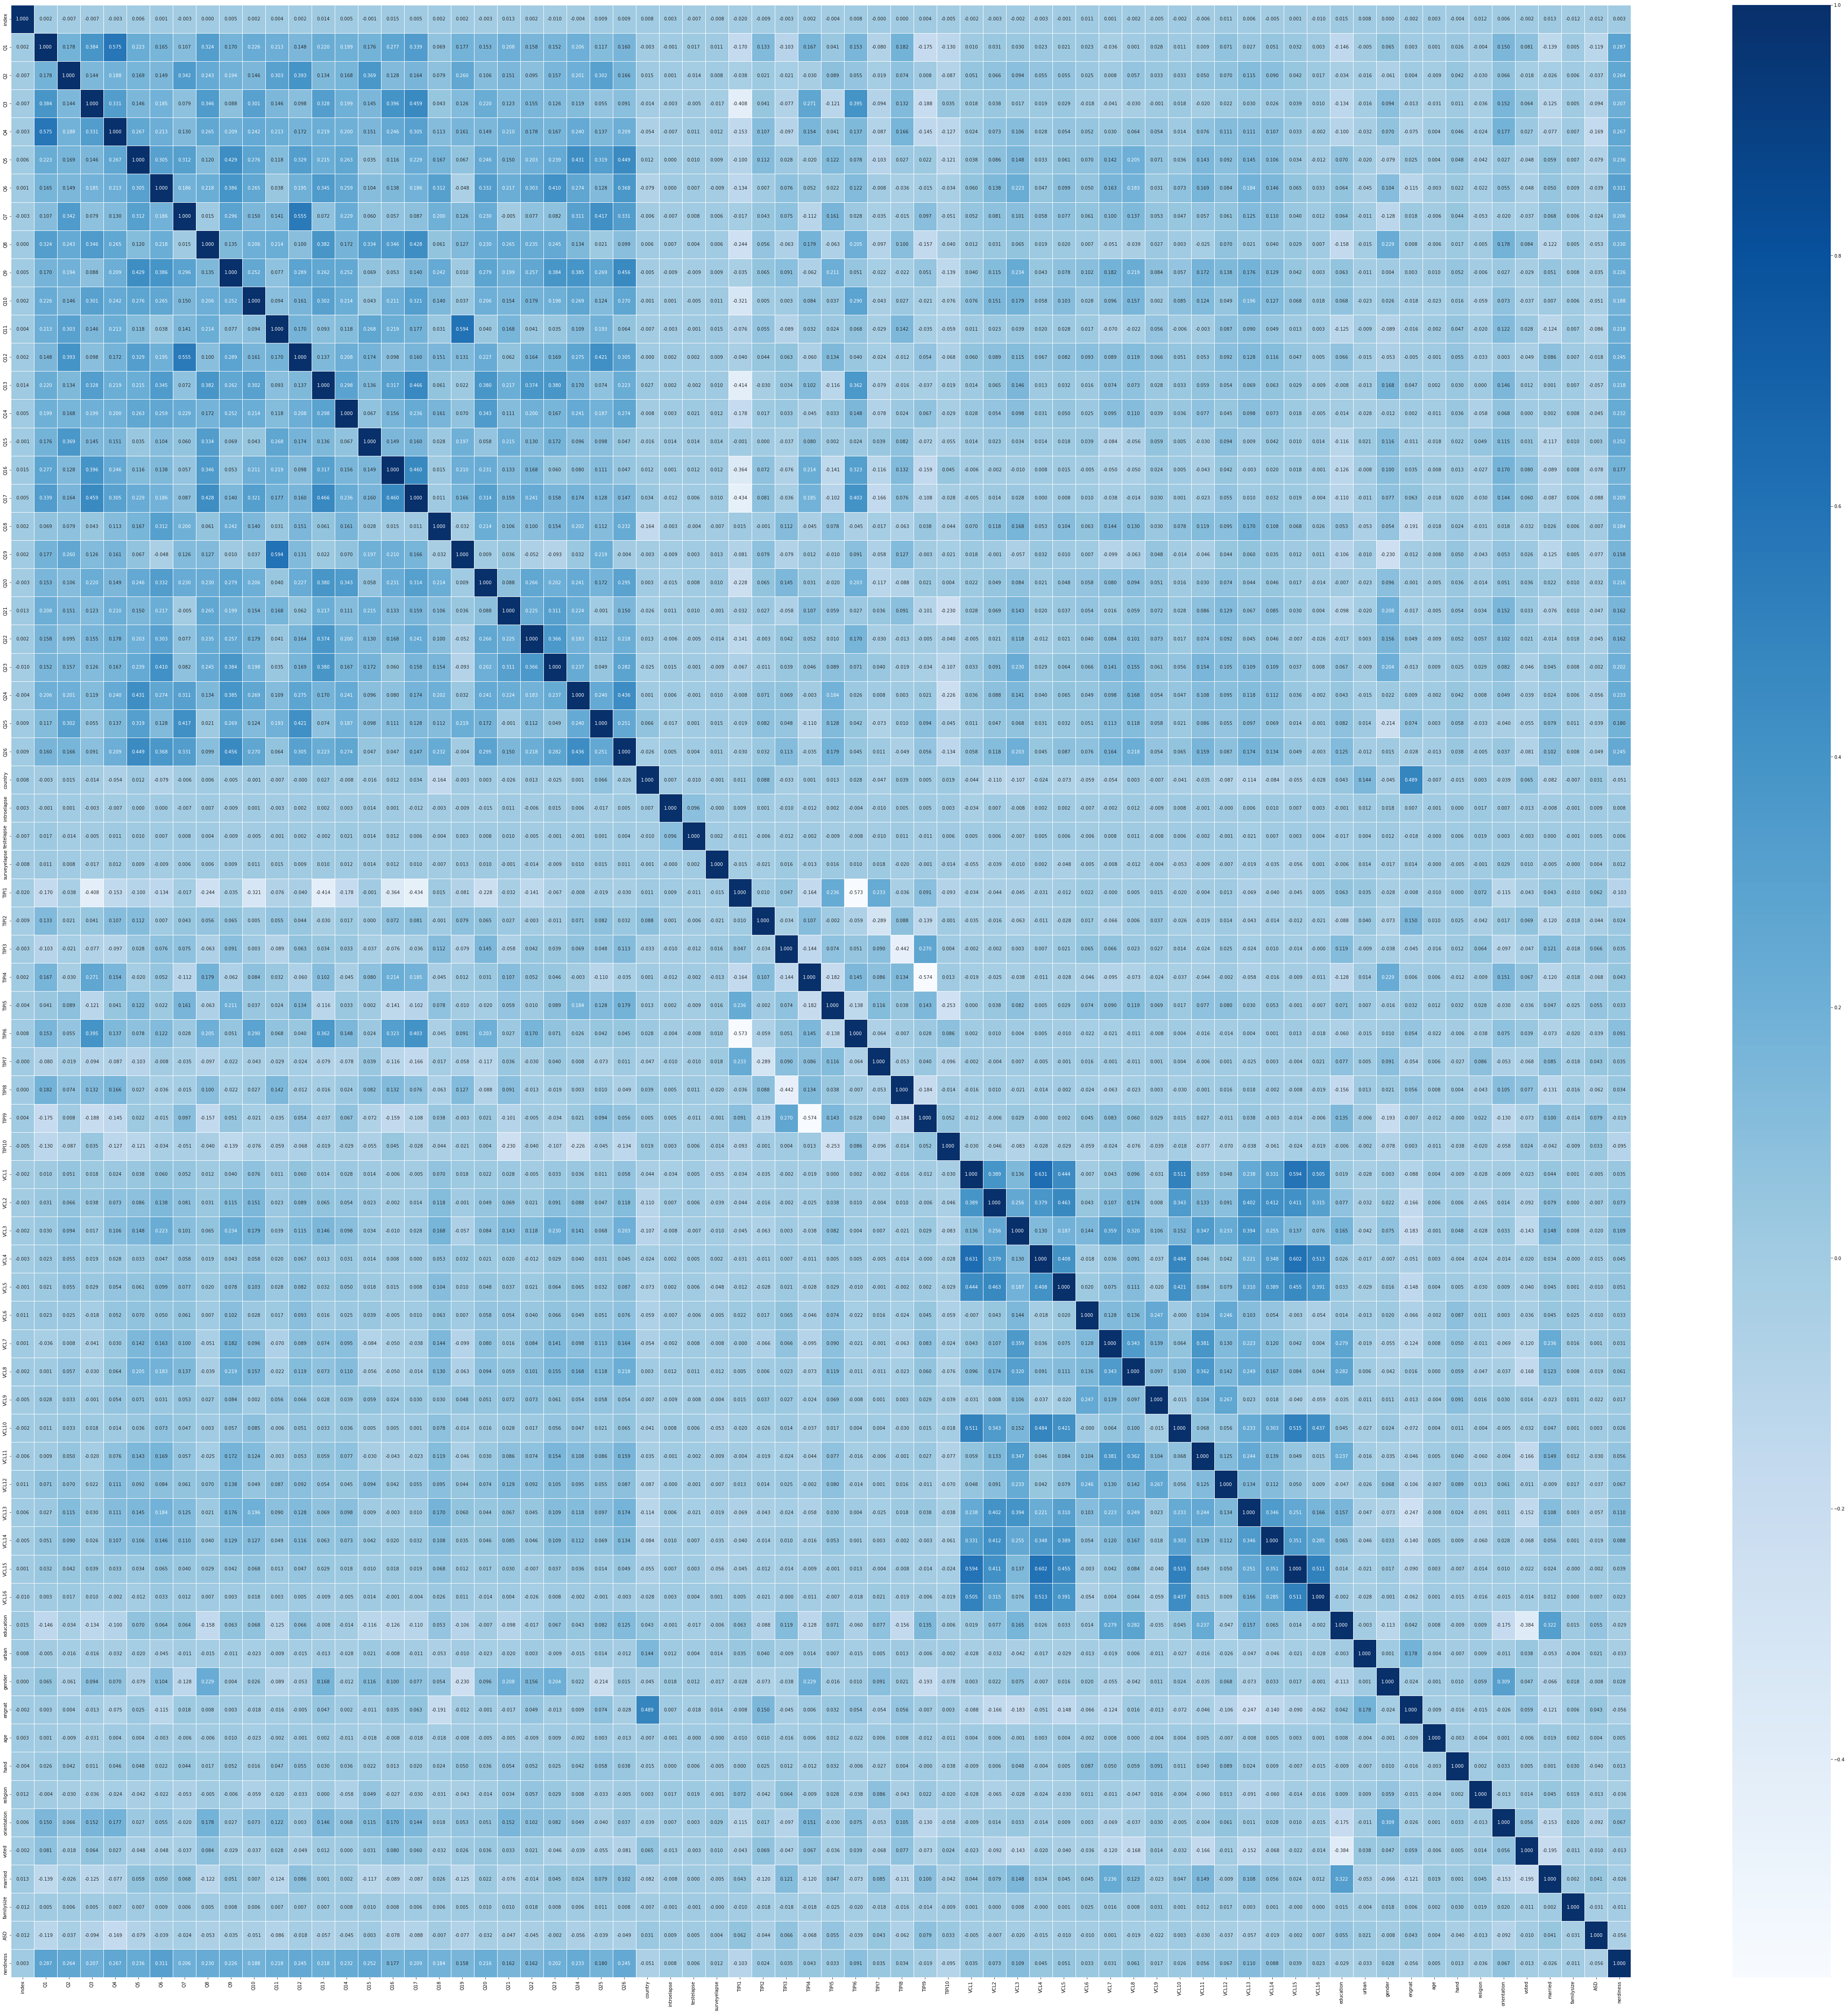

In [22]:
plt.figure(figsize=(80,80))
sns.heatmap(data = train.corr(), annot=True, 
fmt = '.3f', linewidths=.5, cmap='Blues')

In [23]:
from sklearn.ensemble import RandomForestClassifier
X=train
y=test
model = RandomForestClassifier(criterion='entropy')
model.fit(X,y)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
feature_importance

ValueError: Found input variables with inconsistent numbers of samples: [15000, 35452]